# Regression and Gradient Descent

Using this dataset, we wish to model the prices of houses in Portland, as a linear function
of the sizes of their living areas and the number of bedrooms, $h_w(x) = w_0 + w_1x_1 + w_2x_2$.
We denote by $x(i)$ and $x(i)$ the living area and number of bedrooms of the $i-th$ house in the $12$
training set respectively, and we denote by $y(i)$ the price of the $i$-th house in the training set.

If we have $N$ samples $(x^{(i)}, y^{(i)})_{i=1,\dots,N}$, then we consider the cost function: 
$$
  J(w) = J(w_0,w_1,w_2) = \frac{1}{2N}\sum_{i=1}^N\left(y^{(i)} - w_0 - w_1 x^{(i)}_1 - w_2 x^{(i)}_2\right)^2
$$

One step of gradient descent:


We know that the gradient descient formula is 
$$ w^k = w^{k-1} - \alpha \nabla J(w^{k-1}) $$
To get $w^1$, we need to first illustrate $\nabla J(w^0)$
Here we know that
\begin{align}
\frac{\partial J(w_0,w_1,w_2)}{\partial w_0} &= \frac{2}{2N}\sum_{i=1}^{N}\left(y^{(i)} - w_0 - w_1 x^{(i)}_1 - w_2 x^{(i)}_2\right)*(-1)\\
&= -\frac{1}{N}\sum_{i=1}^{N}\left(y^{(i)} - w_0 - w_1 x^{(i)}_1 - w_2 x^{(i)}_2\right)\\
\frac{\partial J(w_0,w_1,w_2)}{\partial w_1} &= -\frac{1}{N}\sum_{i=1}^{N}\left(y^{(i)} - w_0 - w_1 x^{(i)}_1 - w_2 x^{(i)}_2\right)*x^{(i)}_1\\
\frac{\partial J(w_0,w_1,w_2)}{\partial w_0} &= -\frac{1}{N}\sum_{i=1}^{N}\left(y^{(i)} - w_0 - w_1 x^{(i)}_1 - w_2 x^{(i)}_2\right)*x^{(i)}_2
\end{align}
Plug in $w^0_0 = w^0_1 = w^0_2 = 0$, we get 
\begin{align}
\frac{\partial J(w_0,w_1,w_2)}{\partial w_0} &= -\frac{1}{N}\sum_{i=1}^{N}y^{(i)}\\
\frac{\partial J(w_0,w_1,w_2)}{\partial w_1} &= -\frac{1}{N}\sum_{i=1}^{N}y^{(i)}x^{(i)}_1\\
\frac{\partial J(w_0,w_1,w_2)}{\partial w_0} &= -\frac{1}{N}\sum_{i=1}^{N}y^{(i)}x^{(i)}_2
\end{align}
Therefore, we utilize the gradient descient formula above, and $\alpha = 0.1$ to get
\begin{align}
w^1_0 &= 0 - 0.1*-\frac{1}{N}\sum_{i=1}^{N}y^{(i)} = \frac{1}{10}\overline y\\
w^1_1 &= 0 - 0.1*-\frac{1}{N}\sum_{i=1}^{N}y^{(i)}x^{(i)}_1 = \frac{1}{10N}\sum_{i=1}^{N}y^{(i)}x^{(i)}_1\\
w^1_2 &= 0 - 0.1*-\frac{1}{N}\sum_{i=1}^{N}y^{(i)}x^{(i)}_2 = \frac{1}{10N}\sum_{i=1}^{N}y^{(i)}x^{(i)}_2
\end{align}

# Feature normalization

Equations for mean and standard deviation

Mean value:
$$\overline x = \frac{1}{m}(x_1+...+x_m)$$
Standard Deviation:
$$\sigma = \sqrt{\frac{\sum_{i=1}^m(x_i-\overline x)^2}{m}}$$

In [4]:
import numpy as np

def get_mean_stddev(numbers):
  # input: numbers, a list of real numbers
  # output: the mean and standard deviation of numbers
  sum =0
  sum2 = 0
  for i in numbers:
      sum += float(i)
  mean = sum/len(numbers)
  for i in numbers:
      sum2 += (float(i)-mean)**2
  stddev = np.sqrt(sum2/len(numbers))
  return mean, stddev

In [5]:
# Test get_mean_stddev
get_mean_stddev([1, 2, 3, 4, 5])

(3.0, 1.4142135623730951)

In [6]:
# A useful function
def read_data(data_file_name):
  with open(data_file_name, 'r') as input_file:
    areas = []
    nbedrooms = []
    prices = []
    # Read the input file line by line
    lines = input_file.readlines()
    for line in lines:
          words = line.strip().split(',')
          areas.append(float(words[0]))
          nbedrooms.append(float(words[1]))
          prices.append(float(words[2]))

  return areas, nbedrooms, prices

In [7]:
def create_normalized_data(data_file_name):
  areas, nbedrooms, prices = read_data(data_file_name)
  areas_mean, areas_stddev = get_mean_stddev(areas)
  nbedrooms_mean, nbedrooms_stddev = get_mean_stddev(nbedrooms)
  with open('normalized.txt', 'w') as output_file:
    for a,n,p in zip(areas, nbedrooms, prices):
      output_file.write(str((a-areas_mean)/areas_stddev) + ',' + 
                        str((n-nbedrooms_mean)/nbedrooms_stddev) + ',' + 
                        str(p) + '\n')
  # Return the mean and std dev for later use (during prediction)
  return areas_mean, areas_stddev, nbedrooms_mean, nbedrooms_stddev


In [8]:
# Test create_normalized_data
data_file_name = 'housing.txt'
areas_mean, areas_stddev, nbedrooms_mean, nbedrooms_stddev = create_normalized_data(data_file_name)

 # Computing optimal parameters

In [46]:
def optimal_w(x1,x2,y):
    x1 = np.array(x1)
    x2 = np.array(x2)
    y = np.array(y)
    col = np.ones(len(x1))
    x= np.vstack((col, x1, x2)).T
    w = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))
    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    return w0,w1,w2

In [47]:
areas, nbedrooms, prices = read_data('normalized.txt')
print(optimal_w(areas,nbedrooms,prices))

(340412.6595744681, 109447.79646964182, -6578.35485416124)


In [28]:

def gradient_descent(alpha, niter, data):
  # alpha: learning rage
  # niter: number of iterations
  # data: data set
  # outputs values of the parameters and the objective
  w0, w1, w2 = 0., 0., 0.
  areas, nbedrooms, prices = data
  N_samples = len(areas)
  for _ in range (niter):
    y_preds = [w0+w1*x1+w2*x2 for x1,x2 in zip(areas, nbedrooms)]
    errors = [p - y_pred for p,y_pred in zip(prices, y_preds)]
    # Compute partial derivatives
    x1 = np.array(areas)
    x2 = np.array(nbedrooms)
    y = np.array(prices)
    dJ_dw0 = (-1/N_samples)*np.sum(y-(w0+w1*x1+w2*x2))
    dJ_dw1 = (-1/N_samples)*np.sum((y-(w0+w1*x1+w2*x2))*x1)
    dJ_dw2 = (-1/N_samples)*np.sum((y-(w0+w1*x1+w2*x2))*x2)
    # note: I don't use errors here 
    # because the first time I tried errors made the final result a little bit gaps
    # with the correct one in the comment
    # Update weights
    w0 = w0-alpha*dJ_dw0
    w1 = w1-alpha*dJ_dw1
    w2 = w2-alpha*dJ_dw2
  # Do one last evaluation after the last gradient step
  Jw = (1/(2*N_samples))*np.sum((y-(w0+w1*x1+w2*x2))**2)
  return w0, w1, w2, Jw

In [29]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 100

# Try several values of alpha
for alpha in [0.01, 0.1, 0.3]:
  _,_,_, Jw = gradient_descent(alpha, niter, (areas, nbedrooms, prices))
  print("alpha = {}, \t J(w) = {}".format(alpha, Jw))

alpha = 0.01, 	 J(w) = 10596969344.16698
alpha = 0.1, 	 J(w) = 2043462824.618168
alpha = 0.3, 	 J(w) = 2043280050.603576


when alpha = 0.3, we get the smallest value.

In [107]:
def gradient_descent(alpha, niter, data):
  w0, w1, w2 = 0., 0., 0.
  areas, nbedrooms, prices = data
  N_samples = len(areas)
  Jws = []
  x1 = np.array(areas)
  x2 = np.array(nbedrooms)
  y = np.array(prices)
  for k in range (niter):
    Jw = (1/(2*N_samples))*np.sum((y-(w0+w1*x1+w2*x2))**2)
    Jws.append(Jw) 
    if k%10==0:
      print("k={}, J(w)={}".format(k, Jw))
    # Compute partial derivatives
    dJ_dw0 = (-1/N_samples)*np.sum(y-(w0+w1*x1+w2*x2))
    dJ_dw1 = (-1/N_samples)*np.sum((y-(w0+w1*x1+w2*x2))*x1)
    dJ_dw2 = (-1/N_samples)*np.sum((y-(w0+w1*x1+w2*x2))*x2)
    # Update weights
    w0 = w0-alpha*dJ_dw0
    w1 = w1-alpha*dJ_dw1
    w2 = w2-alpha*dJ_dw2
  # Do one last evaluation after the last gradient step
  Jw = (1/(2*N_samples))*np.sum((y-(w0+w1*x1+w2*x2))**2)
  Jws.append(Jw)
  return w0, w1, w2, Jws

k=0, J(w)=65591548106.45744
k=10, J(w)=53802483965.89506
k=20, J(w)=44245589521.92844
k=30, J(w)=36489079464.91514
k=40, J(w)=30186817066.683083
k=50, J(w)=25060807019.775597
k=60, J(w)=20887393221.120014
k=70, J(w)=17486347244.693893
k=80, J(w)=14712219196.319695
k=90, J(w)=12447464565.477882
k=0, J(w)=65591548106.45744
k=10, J(w)=9828412382.488955
k=20, J(w)=3149150567.499295
k=30, J(w)=2247079093.680353
k=40, J(w)=2096405990.7371314
k=50, J(w)=2061269629.246131
k=60, J(w)=2050155296.7053473
k=70, J(w)=2046021948.2604976
k=80, J(w)=2044388322.4515283
k=90, J(w)=2043729844.9843402
k=0, J(w)=65591548106.45744
k=10, J(w)=2176789165.5439835
k=20, J(w)=2048458902.9165492
k=30, J(w)=2043583067.7216742
k=40, J(w)=2043297904.0299792
k=50, J(w)=2043281102.6060784
k=60, J(w)=2043280112.591613
k=70, J(w)=2043280054.2554877
k=80, J(w)=2043280050.8180594
k=90, J(w)=2043280050.6155117


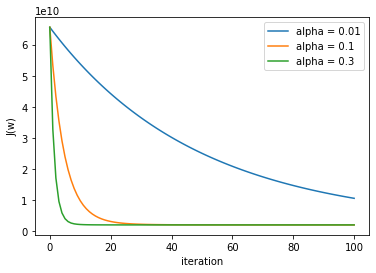

In [113]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 100

# Try several values of alpha
for alpha in (0.01, 0.1, 0.3):
  _,_,_, Jws = gradient_descent(alpha, niter, (areas, nbedrooms, prices))
  plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

k=0, J(w)=65591548106.45744
k=10, J(w)=64303836897.56081
k=20, J(w)=63042880008.80655
k=30, J(w)=61808106035.02419
k=40, J(w)=60598956190.66406
k=50, J(w)=59414884019.5999
k=60, J(w)=58255355111.91811
k=70, J(w)=57119846827.51752
k=80, J(w)=56007848026.347176
k=90, J(w)=54918858805.11559
k=0, J(w)=65591548106.45744
k=10, J(w)=2043331579.4534426
k=20, J(w)=2043280051.0763092
k=30, J(w)=2043280050.6028326
k=40, J(w)=2043280050.602828
k=50, J(w)=2043280050.6028283
k=60, J(w)=2043280050.602829
k=70, J(w)=2043280050.6028283
k=80, J(w)=2043280050.6028283
k=90, J(w)=2043280050.6028283
k=0, J(w)=65591548106.45744
k=10, J(w)=7.99600418545755e+32
k=20, J(w)=1.5465083680004526e+56
k=30, J(w)=2.993741202086319e+79
k=40, J(w)=5.795304485103185e+102
k=50, J(w)=1.1218589653564024e+126
k=60, J(w)=2.171702179558783e+149
k=70, J(w)=4.20399578052314e+172
k=80, J(w)=8.138123490877119e+195
k=90, J(w)=1.5753834544649412e+219


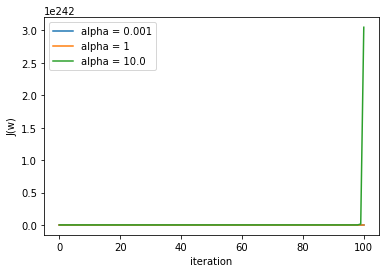

In [110]:
# Try several values of alpha
for alpha in [0.001, 10.0]:
  _,_,_, Jws = gradient_descent(alpha, niter, (areas, nbedrooms, prices))
  plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()


alpha = 0.3 is the best result, alpha = 10 is the worst result. From the graph, we can get if the learning rate is too small, though it will not jump over the local minimum, the small magnitude of gradient will slow down the speed of convergence so for alpha < 0.3, the speed of convergence will be increasing. For alpha =10, since the learning rate is too high, combined with the magnitude of the gradient, we jump over our local minimum. Due to the convex, convex curve of our objective function, as we continue to jump from side to side, the gradient at each jump grows higher. Our error increases quadratically with each “jump”, and our algorithm diverges to infinite error.

For stochastic gradient descent, we consider the loss associated to a given sample point $(x,y)$:
$$
  J(w|x) = J(w_0,w_1,w_2|x) = \frac{1}{2}\left(y - w_0 - w_1 x_1 - w_2 x_2\right)^2
$$

In [58]:
import random

# For the sake of reproducibility we fix 
# the seed of the randomness
random.seed(42) 

def sto_gradient_descent(alpha, niter, data):
  w0, w1, w2 = 0., 0., 0.
  areas, nbedrooms, prices = data
  N_samples = len(areas)
  Jws_sample = []
  Jws = []
  x1 = np.array(areas)
  x2 = np.array(nbedrooms)
  y = np.array(prices)
  for k in range (niter):
    # Pick randomly a sample's index
    i = random.randint(0,N_samples-1)
    Jw_sample = (1/2)*(y[i]-w0-w1*x1[i]-w2*x2[i])**2# value of J on this sample 
    Jws_sample.append(Jw_sample) 
    # Evaluate true J(w)
    Jw = (1/(2*N_samples))*np.sum((y-(w0+w1*x1+w2*x2))**2)# value of J on the whole data set
    Jws.append(Jw)
    if k%10==0:
      print("i={}, J(w|x)={}, J(w)={}".format(i, Jw_sample, Jw))
    # Compute partial derivatives
    dJ_dw0 = -1*(y[i]-(w0+w1*x1[i]+w2*x2[i]))
    dJ_dw1 = -1*((y[i]-(w0+w1*x1[i]+w2*x2[i]))*x1[i])
    dJ_dw2 = -1*((y[i]-(w0+w1*x1[i]+w2*x2[i]))*x2[i])
    # Update weights
    w0 = w0-alpha*dJ_dw0
    w1 = w1-alpha*dJ_dw1
    w2 = w2-alpha*dJ_dw2
  # Do one last evaluation after the last gradient step
  i = random.randint(0,N_samples-1)
  Jw_sample = (1/2)*(y[i]-w0-w1*x1[i]-w2*x2[i])**2
  Jws_sample.append(Jw_sample)
  # Evaluate true J(w) 
  Jw = (1/(2*N_samples))*np.sum((y-(w0+w1*x1+w2*x2))**2)
  Jws.append(Jw)
  return w0, w1, w2, Jws, Jws_sample

i=40, J(w|x)=67896125000.0, J(w)=65591548106.45744
i=5, J(w|x)=37495648019.78809, J(w)=58189522547.4077
i=1, J(w|x)=40612581644.87734, J(w)=43427906701.25152
i=37, J(w|x)=25704898498.17787, J(w)=37347948410.978485
i=21, J(w|x)=20110267670.468613, J(w)=30806886625.704063
i=46, J(w|x)=11477459293.731686, J(w)=25156094824.212215
i=23, J(w|x)=3051197055.221406, J(w)=21224644023.138645
i=14, J(w|x)=10845166554.862038, J(w)=18245143868.13747
i=13, J(w|x)=37210509538.90153, J(w)=15938810829.2648
i=34, J(w|x)=2069726878.591041, J(w)=13388052468.667316
i=14, J(w|x)=7102938830.875418, J(w)=11618052000.981848
i=13, J(w|x)=22511103515.060825, J(w)=10238920163.636063
i=9, J(w|x)=2155048820.681484, J(w)=8907497111.023687
i=25, J(w|x)=4428484534.8189945, J(w)=7798805400.277448
i=40, J(w|x)=18930728614.80897, J(w)=7364865227.042471
i=33, J(w|x)=24144084957.792213, J(w)=6081268655.719829
i=41, J(w|x)=1134179086.3996568, J(w)=5354111990.139566
i=16, J(w|x)=8609865795.102783, J(w)=4933999495.283265
i=12,

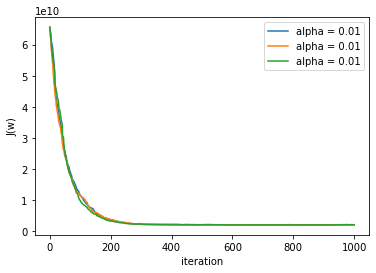

In [59]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 1000

# Try several runs with the same alpha
for alpha in (0.01, 0.01, 0.01):
  _,_,_, Jws, _ = sto_gradient_descent(alpha, niter, (areas, nbedrooms, prices))
  plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

i=12, J(w|x)=54449670000.5, J(w)=65591548106.45744
i=37, J(w|x)=6537516232.579957, J(w)=11330545560.421791
i=13, J(w|x)=10526167731.50646, J(w)=5701300283.195378
i=15, J(w|x)=2238690286.50601, J(w)=2693690391.994925
i=16, J(w|x)=8760288552.12716, J(w)=3344825615.934186
i=23, J(w|x)=3002793698.6694965, J(w)=2502758190.938192
i=37, J(w|x)=34255126.51698646, J(w)=2078913515.4370399
i=36, J(w|x)=291044678.63264006, J(w)=2228143144.0834546
i=41, J(w|x)=947799801.3225198, J(w)=2402224301.7032847
i=31, J(w|x)=349811988.41857326, J(w)=2716982347.6043415
i=26, J(w|x)=107880125000.0, J(w)=65591548106.45744
i=29, J(w|x)=449612968.26136166, J(w)=17742119129.36295
i=1, J(w|x)=5683210736.820318, J(w)=4276695615.1400847
i=34, J(w|x)=19179482.374714926, J(w)=2177318716.1308084
i=33, J(w|x)=1812677105.306802, J(w)=2258048003.921701
i=5, J(w|x)=527157283.16461957, J(w)=2290407951.8182964
i=5, J(w|x)=1813876612.645276, J(w)=2478575404.916298
i=3, J(w|x)=1208328039.4442897, J(w)=2126199704.4355586
i=36, J

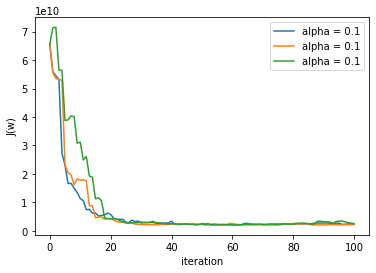

In [60]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 100

# Try several runs with the same alpha
for alpha in (0.1, 0.1, 0.1):
  _,_,_, Jws, _ = sto_gradient_descent(alpha, niter, (areas, nbedrooms, prices))
  plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

### Comment on the comparison with gradient descent for the same learning rates.
Question 7 uses gradient descent, which the partial derivatives are derived from a smooth convex function, so after every update, the graph still looks like smoothly.
But Question 10 uses stochastic gradient descent, which the partial derivatives are derived from a discrete random point, so after each update, the graph will not looks so smooth.

## Question 10

i=27, J(w|x)=109980500000.0, J(w)=65591548106.45744
i=26, J(w|x)=21794561515.932144, J(w)=6481880041.290735
i=13, J(w|x)=51279447944.873116, J(w)=8484220374.540765
i=23, J(w|x)=30898071085.42579, J(w)=19876961820.3148
i=21, J(w|x)=5669253489.174079, J(w)=5176354547.824409
i=13, J(w|x)=28117164426.747322, J(w)=42571357662.68795
i=37, J(w|x)=7489056779.379201, J(w)=6992296491.14376
i=21, J(w|x)=16572899370.471106, J(w)=3824362851.6112785
i=12, J(w|x)=588205692.8931285, J(w)=2899124044.566434
i=45, J(w|x)=79863442.84098223, J(w)=2939264813.9831343
i=17, J(w|x)=19980005000.0, J(w)=65591548106.45744
i=31, J(w|x)=186971118520.62125, J(w)=51996893023.20897
i=24, J(w|x)=328014937056.9482, J(w)=78551900886.75096
i=37, J(w|x)=307081162267199.3, J(w)=485160483032086.56
i=19, J(w|x)=340491148537.0571, J(w)=39336342411087.33
i=34, J(w|x)=82379527150.40239, J(w)=119150765341.68321
i=41, J(w|x)=180440419.95132327, J(w)=25540096556.10381
i=23, J(w|x)=167031390194.44006, J(w)=533664137824.181
i=18, J(w

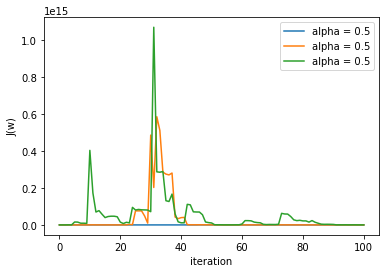

In [106]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 100

# Try several runs with the same alpha
for alpha in (0.5, 0.5, 0.5):
  _,_,_, Jws, _ = sto_gradient_descent(alpha, niter, (areas, nbedrooms, prices))
  plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

### Comment on the comparison with the previous experiments with stochastic gradient descent (other learning rates), and with gradient descent (e.g. with learning rate 1.0 for gradient descent and 0.5 for the stochastic version).


1. stochastic gradient descent will change the random points each time, so the Jw function will change. But gradient descient will make the Jw trend fixed.
2. For learning rate = 0.5, we notice the stochastic gradient descent approach will not converge, but for learning rate = 0.1 or 0.01, we notice the stochastic gradient descent approach will converge.
3. with learning rate 1.0 for gradient descent and 0.5 for the stochastic version): we notice that alpha = 1 for gradient descent converges really fast, but alpha = 0.5 for the stochastic version doesn't converge



k=0, J(w)=65591548106.45744
k=10, J(w)=53802483965.89506
k=20, J(w)=44245589521.92844
k=30, J(w)=36489079464.91514
k=40, J(w)=30186817066.683083
k=50, J(w)=25060807019.775597
k=60, J(w)=20887393221.120014
k=70, J(w)=17486347244.693893
k=80, J(w)=14712219196.319695
k=90, J(w)=12447464565.477882
k=0, J(w)=65591548106.45744
k=10, J(w)=9828412382.488955
k=20, J(w)=3149150567.499295
k=30, J(w)=2247079093.680353
k=40, J(w)=2096405990.7371314
k=50, J(w)=2061269629.246131
k=60, J(w)=2050155296.7053473
k=70, J(w)=2046021948.2604976
k=80, J(w)=2044388322.4515283
k=90, J(w)=2043729844.9843402
k=0, J(w)=65591548106.45744
k=10, J(w)=2176789165.5439835
k=20, J(w)=2048458902.9165492
k=30, J(w)=2043583067.7216742
k=40, J(w)=2043297904.0299792
k=50, J(w)=2043281102.6060784
k=60, J(w)=2043280112.591613
k=70, J(w)=2043280054.2554877
k=80, J(w)=2043280050.8180594
k=90, J(w)=2043280050.6155117
k=0, J(w)=65591548106.45744
k=10, J(w)=2043331579.4534426
k=20, J(w)=2043280051.0763092
k=30, J(w)=2043280050.6028

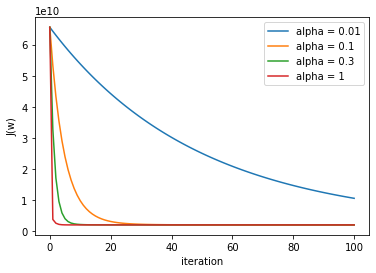

In [114]:
# Here we test the gradient descent case learning rate = 1.0
# # Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 100

# Try several values of alpha
for alpha in (0.01, 0.1, 0.3,1):
  _,_,_, Jws = gradient_descent(alpha, niter, (areas, nbedrooms, prices))
  plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()


# Prediction

In [65]:
# This is a result before normalization
areas,nbedrooms,prices = read_data("normalized.txt")
w01,w11,w21 = optimal_w(areas,nbedrooms,prices)
w02,w12,w22,Jws = gradient_descent(alpha, niter,(areas,nbedrooms,prices))
w03,w13,w23,Jw,Jws_sample = sto_gradient_descent(alpha,niter,(areas,nbedrooms,prices))
optimal_w_pre = w01+w11*1650+w21*3
gradient_descent_pre = w02+w12*1650+w22*3
sto_gradient_descent_pre = w03+w13*1650+w23*3

print("Exact formula prediction (before normalization):",optimal_w_pre)
print("gradient descent prediction (before normalization):", gradient_descent_pre)
print("stochastic gradient descent prediction (before normalization):",sto_gradient_descent_pre)


k=0, J(w)=65591548106.45744
k=10, J(w)=2053621301.114161
k=20, J(w)=2043351493.004735
k=30, J(w)=2043280546.8124447
k=40, J(w)=2043280054.0492997
k=50, J(w)=2043280050.6267667
k=60, J(w)=2043280050.602995
k=70, J(w)=2043280050.602829
k=80, J(w)=2043280050.6028285
k=90, J(w)=2043280050.6028285
i=19, J(w|x)=179400500000.0, J(w)=65591548106.45744
i=0, J(w|x)=6532204478.523624, J(w)=113445837869.34834
i=26, J(w|x)=28770312271.156593, J(w)=16862294157.670475
i=46, J(w|x)=25577074673.52248, J(w)=40099144172.89965
i=15, J(w|x)=11016054593.14888, J(w)=11052383660.611048
i=19, J(w|x)=995142602039.1172, J(w)=447247156034.60114
i=15, J(w|x)=32372540964.60538, J(w)=812986096175.7051
i=0, J(w|x)=608897258245.6125, J(w)=1391158421866.651
i=11, J(w|x)=847347337197.4015, J(w)=1399635225203.1543
i=3, J(w|x)=485124965752.0039, J(w)=384300026030.8047
Exact formula prediction (before normalization): 180909541.769921
gradient descent prediction (before normalization): 180909541.76837653
stochastic gradient

In [63]:
#This is a result after the normalization
areas_mean, areas_stddev, nbedrooms_mean, nbedrooms_stddev = create_normalized_data('housing.txt')
norm_area=(1650-areas_mean)/areas_stddev
norm_room=(3-nbedrooms_mean)/nbedrooms_stddev

norm_optimal_w_pre = w01+w11*norm_area+w21*norm_room
norm_gradient_descent_pre = w02+w12*norm_area+w22*norm_room
norm_sto_gradient_descent_pre = w03+w13*norm_area+w23*norm_room

print("Exact formula prediction (after normalization):",norm_optimal_w_pre)
print("gradient descent prediction (after normalization):", norm_gradient_descent_pre)
print("stochastic gradient descent prediction (after normalization):",norm_sto_gradient_descent_pre)

Exact formula prediction (after normalization): 293081.4643348961
gradient descent prediction (after normalization): 293081.4643351024
stochastic gradient descent prediction (after normalization): 358776.0855929283


we should use data after normalization to solve the problem, since the weight we trained was baseed on the normalized data, so for new predicted data, we should also use the normalized one.

# Polynomial regression 

We now consider a regression with polynomials of degree $2$, and the cost function: 
$$
  J(w) = J(w_0,w_1,w_2) = \frac{1}{2N}\sum_{i=1}^N\left(y^{(i)} - w_0 - w_1 x^{(i)}_1 - w_2 x^{(i)}_2  - w_3 x^{(i)}_1 x^{(i)}_1 - w_4 x^{(i)}_1 x^{(i)}_2 - w_5 x^{(i)}_2 x^{(i)}_2\right)^2
$$

In [72]:
import random

# For the sake of reproducibility we fix 
# the seed of the randomness
random.seed(42) 

def sto_gradient_descent_poly(alpha, niter, data):
  w0, w1, w2, w3, w4, w5 = 0., 0., 0., 0., 0., 0.
  areas, nbedrooms, prices = data
  N_samples = len(areas)
  Jws_sample = []
  Jws = []
  x1 = np.array(areas)
  x2 = np.array(nbedrooms)
  y = np.array(prices)
  for k in range (niter):
    # Pick randomly a sample's index
    i = random.randint(0,N_samples-1)
    Jw_sample = (1/2)*(y[i]-w0-w1*x1[i]-w2*x2[i]-w3*x1[i]*x1[i]-w4*x1[i]*x2[i]-w5*x2[i]*x2[i])**2# value of J on this sample 
    Jws_sample.append(Jw_sample) 
    # Evaluate true J(w)
    Jw = (1/(2*N_samples))*np.sum((y-(w0+w1*x1+w2*x2+w3*x1*x1+w4*x1*x2+w5*x2*x2))**2)# value of J on the whole data set
    Jws.append(Jw)
    if k%10==0:
      print("i={}, J(w|x)={}, J(w)={}".format(i, Jw_sample, Jw))
    # Compute partial derivatives
    dJ_dw0 = -1*(y[i]-w0-w1*x1[i]-w2*x2[i]-w3*x1[i]*x1[i]-w4*x1[i]*x2[i]-w5*x2[i]*x2[i])
    dJ_dw1 = dJ_dw0 *x1[i]
    dJ_dw2 = dJ_dw0 *x2[i]
    dJ_dw3 = dJ_dw0 *x1[i]*x1[i]
    dJ_dw4 = dJ_dw0 *x1[i]*x2[i]
    dJ_dw5 = dJ_dw0 *x2[i]*x2[i]
    # Update weights
    w0 = w0-alpha*dJ_dw0
    w1 = w1-alpha*dJ_dw1
    w2 = w2-alpha*dJ_dw2
    w3 = w3-alpha*dJ_dw3
    w4 = w4-alpha*dJ_dw4
    w5 = w5-alpha*dJ_dw5
  # Do one last evaluation after the last gradient step
  i = random.randint(0,N_samples-1)
  Jw_sample = (1/2)*(y[i]-w0-w1*x1[i]-w2*x2[i]-w3*x1[i]*x1[i]-w4*x1[i]*x2[i]-w5*x2[i]*x2[i])**2
  Jws_sample.append(Jw_sample)
  # Evaluate true J(w) 
  Jw = (1/(2*N_samples))*np.sum((y[i]-w0-w1*x1[i]-w2*x2[i]-w3*x1[i]*x1[i]-w4*x1[i]*x2[i]-w5*x2[i]*x2[i])**2)
  Jws.append(Jw)
  
  return w0, w1, w2, w3, w4, w5, Jws, Jws_sample

i=40, J(w|x)=67896125000.0, J(w)=65591548106.45744
i=5, J(w|x)=31999124146.803795, J(w)=47220145248.58572
i=1, J(w|x)=34534060335.07038, J(w)=29422967581.102997
i=37, J(w|x)=18396533264.51412, J(w)=25702163750.70719
i=21, J(w|x)=6363183810.023515, J(w)=32406485546.276638
i=46, J(w|x)=3509772961.9713426, J(w)=20293787274.47399
i=23, J(w|x)=2727155117.975608, J(w)=18844144874.30364
i=14, J(w|x)=2740797662.088192, J(w)=20152207899.401188
i=13, J(w|x)=237568762141.67316, J(w)=20926364301.488792
i=34, J(w|x)=2885441064.851159, J(w)=14416452086.102272
i=14, J(w|x)=2471918423.315011, J(w)=12883550145.236988
i=13, J(w|x)=27180090043.06948, J(w)=12218169341.569063
i=9, J(w|x)=2617561044.2652545, J(w)=12117520638.930637
i=25, J(w|x)=141036804.78287587, J(w)=9908973011.678747
i=40, J(w|x)=21193671250.209362, J(w)=10122741160.8737
i=33, J(w|x)=34958696538.13873, J(w)=9538083968.374327
i=41, J(w|x)=8574374043.826614, J(w)=8430767198.269477
i=16, J(w|x)=2420606932.864135, J(w)=7807302799.330498
i=12

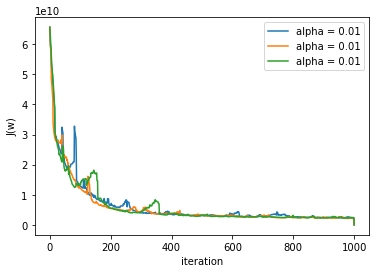

In [73]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 1000

# Try several runs with the same alpha
for alpha in (0.01, 0.01, 0.01):
  _,_,_,_,_,_, Jws, _ = sto_gradient_descent_poly(alpha, niter, (areas, nbedrooms, prices))
  plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()